In [30]:
import torch
import numpy as np
import scipy as sp 
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 10) 

In [104]:

time_steps = 150

#input is just random noise
inputs = np.random.rand(time_steps) * 0.4
input_tensor = torch.from_numpy(inputs).float() # creates tensor from numpy array and  float converts float64 to float32)
input_tensor = input_tensor[:, None, None]  # extend the axis of array
 
frequency = 20
x_ = np.linspace(0, frequency, time_steps)
target = np.cos(2*x_)  
target_tensor = torch.from_numpy(target).float().reshape((-1, 1, 1))

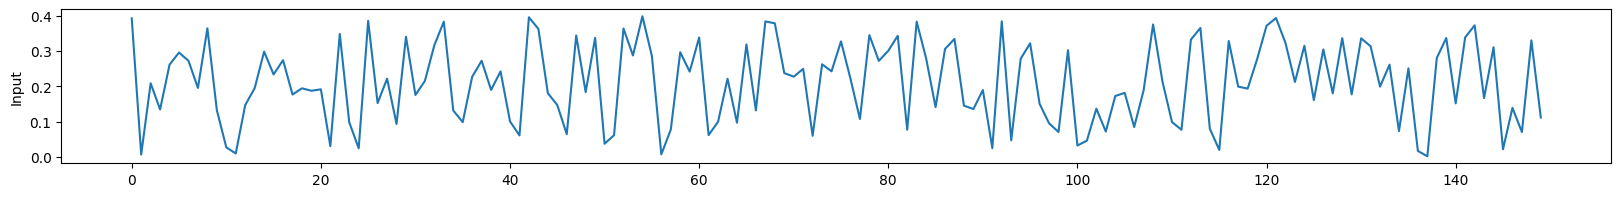

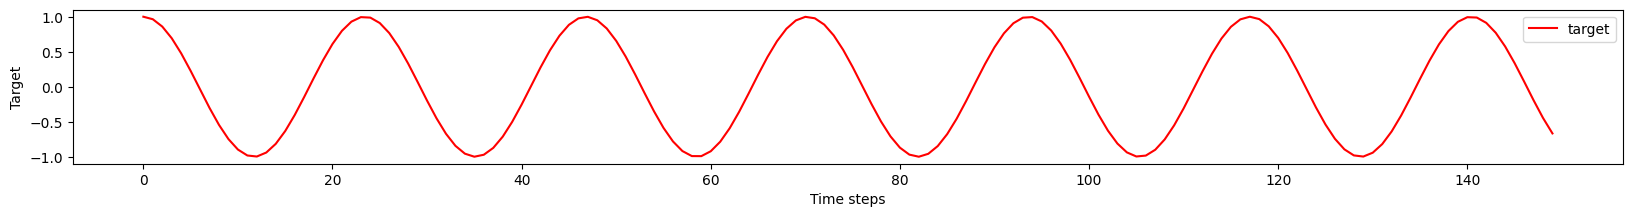

In [106]:
plt.figure(1, figsize=(20, 2))
plt.plot(inputs, label='input')
plt.ylabel('Input');


plt.figure(2, figsize=(20, 2))
plt.plot(target, 'r', label="target")
plt.ylabel("Target")
plt.xlabel("Time steps");


plt.legend()
plt.show()

In [97]:
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNNModel, self).__init__()
        # hidden dimensions ( = number of neurons of the recurrent pool)
        self.hidden_dim = hidden_dim
        
        # nos of hidden layers (if there are multiple RNNs)
        self.layer_dim = layer_dim
        
        # RNN 
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, nonlinearity='relu')
        
        # readout layer 
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    
    def forward(self, x):
        # onetime step
        hidden, _hn = self.rnn(x) #updates RNN (hn is tensor containing final hidden state)
        out = self.fc(hidden[:, :])  #linear readout
        return out, hidden

In [100]:
epochs = 500
losses = []

model = RNNModel(1, 100, 1, 1)  # input_dim, hidden_dim, layer_dim, output_dim

criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) 


for epoch in range(epochs):
    yhat, hidden = model(input_tensor) 
    if epoch ==1:
        hidden1 = hidden 
        yhat1 = yhat
        
    optimizer.zero_grad()
    loss = criterion(target_tensor, yhat)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    
    
    if epoch % 10 == 0:
        print ('Iter {}, Loss {:0.4f}'.format(epoch, loss))
    
    
output, hidden = model.forward(input_tensor)

Iter 0, Loss 0.4974
Iter 10, Loss 0.4962
Iter 20, Loss 0.4956
Iter 30, Loss 0.4954
Iter 40, Loss 0.4953
Iter 50, Loss 0.4952
Iter 60, Loss 0.4951
Iter 70, Loss 0.4950
Iter 80, Loss 0.4949
Iter 90, Loss 0.4948
Iter 100, Loss 0.4947
Iter 110, Loss 0.4946
Iter 120, Loss 0.4945
Iter 130, Loss 0.4944
Iter 140, Loss 0.4943
Iter 150, Loss 0.4942
Iter 160, Loss 0.4940
Iter 170, Loss 0.4939
Iter 180, Loss 0.4937
Iter 190, Loss 0.4936
Iter 200, Loss 0.4934
Iter 210, Loss 0.4931
Iter 220, Loss 0.4929
Iter 230, Loss 0.4926
Iter 240, Loss 0.4921
Iter 250, Loss 0.4916
Iter 260, Loss 0.4910
Iter 270, Loss 0.4902
Iter 280, Loss 0.4892
Iter 290, Loss 0.4879
Iter 300, Loss 0.4864
Iter 310, Loss 0.4847
Iter 320, Loss 0.4825
Iter 330, Loss 0.4791
Iter 340, Loss 0.4727
Iter 350, Loss 0.4577
Iter 360, Loss 0.3297
Iter 370, Loss 0.1805
Iter 380, Loss 0.1372
Iter 390, Loss 0.1224
Iter 400, Loss 0.1120
Iter 410, Loss 0.1050
Iter 420, Loss 0.0975
Iter 430, Loss 0.0911
Iter 440, Loss 0.0863
Iter 450, Loss 0.0822

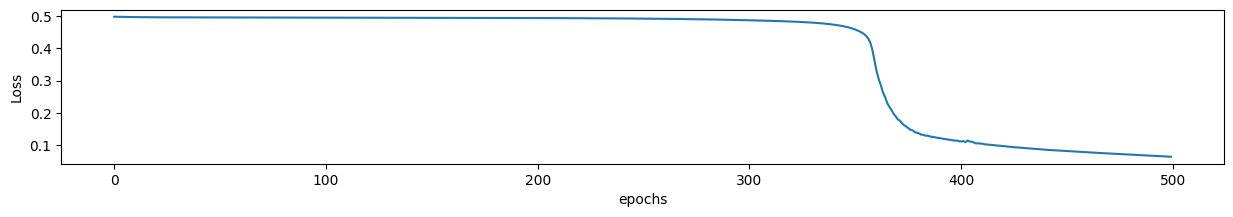

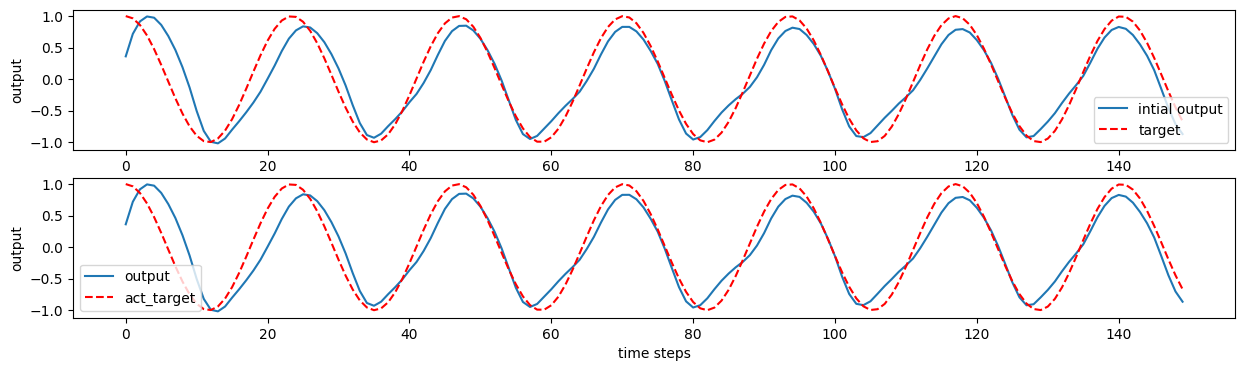

In [102]:
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 2))

ax1.plot(losses)
ax1.set_ylabel('Loss')
ax1.set_xlabel('epochs')


fig, (ax1, ax2) = plt.subplots(2, 1 , figsize=(15, 4))
ax1.plot(yhat.detach().numpy().reshape(-1), label="intial output")
ax1.plot(target, 'r--', label='target')
ax1.set_ylabel('output')
ax1.legend()


ax2.plot(output.detach().numpy().reshape(-1), label='output')
ax2.plot(target, 'r--', label='act_target')
ax2.set_ylabel('output')
ax2.set_xlabel('time steps')
ax2.legend()

In [ ]:
###########################
#Plotting
###########################
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 2))

ax1.plot(losses)
ax1.set_ylabel('Loss')
ax1.set_xlabel('epochs')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 4))
ax1.plot(yhat1.detach().numpy().reshape(-1),label=" initital output")
ax1.plot(target,'r--',label="target")
ax1.set_ylabel('output')
ax1.legend()

ax2.plot(output.detach().numpy().reshape(-1),label="output")
ax2.plot(target,'r--',label="target")
ax2.set_ylabel('output')
ax2.set_xlabel('time steps')
ax2.legend()